
We have to predict which employee has a higher chance of getting promoted and help the organization to expedite the appraisal and promotion process

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

In [109]:
import pandas as pd
import numpy as np

In [110]:
train=pd.read_csv("D:\\Datasets\\train.csv")
test=pd.read_csv("D:\\Datasets\\test.csv")

In [111]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [112]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [113]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [114]:
train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Text(0, 0.5, 'Frequency')

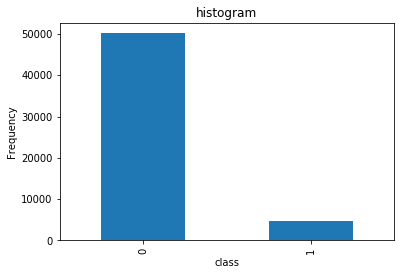

In [115]:
#A barplot to visualize the imbalanced dataset
import matplotlib.pyplot as plt
pd.value_counts(train['is_promoted']).plot.bar()
plt.title('histogram')
plt.xlabel('class')
plt.ylabel('Frequency')

From the above histogram,we can see that the class is_promoted is imbalanced.So we apply smote technique in order to balance the 
dataset

Next,we move on to deal with missing values

In [116]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
previous_year_rating,4124,0.075244
education,2409,0.043953
is_promoted,0,0.000000
avg_training_score,0,0.000000
awards_won?,0,0.000000
KPIs_met >80%,0,0.000000
length_of_service,0,0.000000
age,0,0.000000
no_of_trainings,0,0.000000
recruitment_channel,0,0.000000


Next we deal with the missing values..

In [117]:

train["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

From the above we can see that bachelor's held the majority.So,we fill the missing values with the majority class.

In [118]:
train["education"] = train["education"].fillna("Bachelor's")
test["education"] = test["education"].fillna("Bachelor's")

In [119]:
train["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

Here we can find that 3 star ratings held the majority class..so we fill the missing values with the majority class

In [120]:
train["previous_year_rating"] = train["previous_year_rating"].fillna(3)
test["previous_year_rating"] = test["previous_year_rating"].fillna(3)

Next step,we convert the categorical data into numerical values..

In [121]:
train["department"] = train["department"].astype('category')
train["department"] = train["department"].cat.codes
train["region"] = train["region"].astype('category')
train["region"] = train["region"].cat.codes
train["gender"] = train["gender"].astype('category')
train["gender"] = train["gender"].cat.codes
train["education"] = train["education"].astype('category')
train["education"] = train["education"].cat.codes
train["recruitment_channel"] = train["recruitment_channel"].astype('category')
train["recruitment_channel"] = train["recruitment_channel"].cat.codes

In [122]:
test["department"] = test["department"].astype('category')
test["department"] = test["department"].cat.codes
test["region"] = test["region"].astype('category')
test["region"] = test["region"].cat.codes
test["gender"] = test["gender"].astype('category')
test["gender"] = test["gender"].cat.codes
test["education"] = test["education"].astype('category')
test["education"] = test["education"].cat.codes
test["recruitment_channel"] = test["recruitment_channel"].astype('category')
test["recruitment_channel"] = test["recruitment_channel"].cat.codes

In [123]:
x=np.array(train.iloc[:, train.columns != 'is_promoted'])
y=np.array(train.iloc[:, train.columns == 'is_promoted'])

Next we split the data into training and testing

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


Now we apply smote technique on the training data..

In [125]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [126]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_train,y_train=sm.fit_sample(x_train, y_train.ravel())

Next we apply random forest for training

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(x_train,y_train);

Next we Use the forest's predict method on the test data..

In [148]:
predictions = rf.predict(x_test)


In [149]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions.round())

In [150]:
cm

array([[14972,    85],
       [  990,   396]], dtype=int64)

In [151]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions.round(),average="micro") 

0.9346226357720611

In [152]:
predictions = rf.predict(test)

In [153]:

predictions=pd.Series(predictions)

In [161]:
submission=pd.concat([test["employee_id"],predictions], axis=1)

In [162]:
submission.drop(submission.index[0])

,employee_id,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0
10,60245,0


In [165]:
submission.rename(columns = {0:'is_promoted'}, inplace = True) 

In [166]:
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


In [167]:
submission=submission.to_csv('out.csv')